In [36]:
%matplotlib inline
import numpy as np
from  matplotlib import pyplot as plt 

In [37]:
def get_matrix(dim):
    '''
    Parameters:
        dim <int> dimension of matrix
    Return:
        m <array((dim, <float>), (dim, <float>))>
    '''
    m = np.random.standard_normal((dim, dim))
    m = m + m.T
    return m

In [38]:
def get_ensemble(num, dim):
    '''
    Parameters:
        num <int>  size of ensemble
        dim <int> dimension of matrix
    Return:
        ensemble <list(num, <array((dim, <float>), (dim, <float>))>)>
    '''
    ensemble = map(lambda i: get_matrix(dim) , range(num))
    return ensemble



In [130]:
def get_center_eigenvalues_differences(ensemble, dim):
    '''
    Parameters:
        ensemble <list(num, <array((dim, <float>), (dim, <float>))>)>
        dim <int> dimension of matrix
    Return:
        center_list <list(num, <float>)>
    '''
    num_matrices = len(ensemble)
    center_list = np.array([])
    for m in ensemble:
        vals = np.sort(np.linalg.eigvals(m))
        center_list = np.append(center_list, [vals[dim//2] - vals[dim//2-1]])

    return center_list

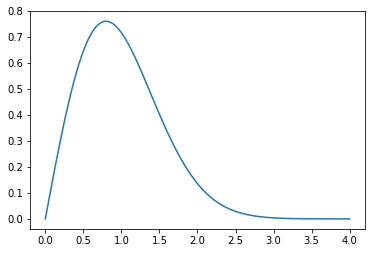

In [66]:
get_wigner = lambda l: (np.pi*l/2)*np.exp(-np.pi*l**2./4.)
ls = np.linspace(0, 4, 1000)
plt.plot(ls, [get_wigner(l) for l in ls])

In [131]:
def compare_wigner(num, dim, bins=30):
    '''
    Parameters:
        num <int> size of ensemble
        dim <int> dimension of matrix
        bin <int> histogram bin

    Return:
        return <figure>
    '''
    fig, ax1 = plt.subplots(1, 1)
    
    ensemble = get_ensemble(num, dim)
    center_list = get_center_eigenvalues_differences(list(ensemble), dim)
    
    ls = np.sort(center_list.real)
    norm_diffs = ls/np.mean(ls)
    
    xs, bins, p = ax1.hist(norm_diffs, bins=bins, normed=1)
    heights_wigner = [get_wigner(l) for l in ls]
    ax1.plot(ls, heights_wigner, linewidth=3, c="r")
    
    plt.show()
    return fig


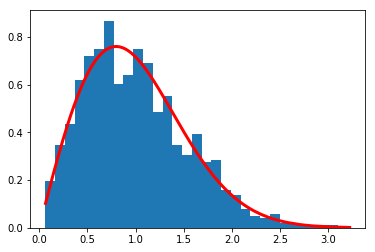

In [133]:
fig = compare_wigner(1000, 20)